In [1]:
## import the required libraries
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


In [2]:
# Load the dataset
df = pd.read_csv(r"C:\Users\vidhi\OneDrive\Documents\Healthcare Prediction Using ML\Datasets\prepocessed_lungs_data.csv")

In [3]:
##Check for missing values
df.replace("?", np.nan, inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)

# Convert all columns to numeric
df = df.apply(pd.to_numeric, errors='coerce')

print(df.columns)

# Define features and target
target_column = "LUNG_CANCER" 
X = df.drop(columns=[target_column])
y = df[target_column].astype(int)

print("Number of Features in X:", X.shape[1])


# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')
Number of Features in X: 15


In [4]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}


# Train, predict and evaluate
best_model = None
best_model_name = ""
best_accuracy = 0

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")
    
    if acc > best_accuracy:
        best_accuracy = acc
        best_model = model
        best_model_name = name
        


Logistic Regression Accuracy: 0.9677
Decision Tree Accuracy: 0.9516
Random Forest Accuracy: 0.9677
SVM Accuracy: 0.9677
KNN Accuracy: 0.9355


In [7]:
# Save best model and scaler
with open("models/best_lung_cancer_model.sav", "wb") as f:
    pickle.dump((scaler, best_model), f)
    

print(f"\n✅ Best Model: {best_model_name} with accuracy {best_accuracy:.4f}")
print("📦 Saved to: models/best_lung_cancer_model.sav")



✅ Best Model: Logistic Regression with accuracy 0.9677
📦 Saved to: models/best_lung_cancer_model.sav


C:\Users\vidhi\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


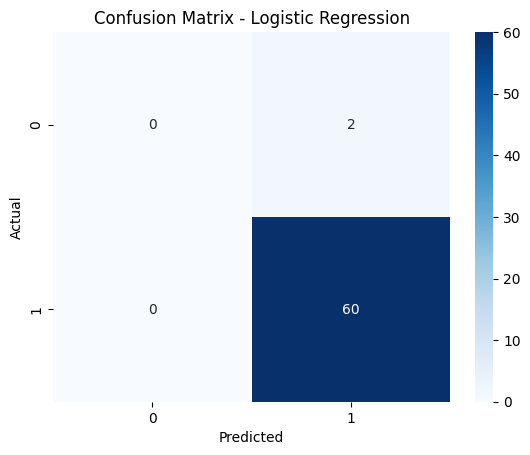

In [8]:
# Confusion Matrix
y_pred_best = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [9]:
# Prediction Example
input_data = (119.992, 157.302, 74.997, 0.00784, 0.00007, 0.0037, 0.00554, 0.011, 0.018, 0.026, 0.165, 0.00908, 0.01583, 0.016, 0.019, 0.031, 20.88, 0.414, 0.813, -4.813, 0.233, 2.056)
#  Check number of features in training dataset
expected_features = X.shape[1]  
actual_features = len(input_data)

print(f"Expected features: {expected_features}, Given features: {actual_features}")

#  Ensure input data has the correct number of features
if actual_features > expected_features:
    input_data = input_data[:expected_features]  # Trim extra values
elif actual_features < expected_features:
    raise ValueError(f"Input data is missing {expected_features - actual_features} features!")

# Convert input data to numpy array & reshape
input_data_as_numpy_array = np.asarray(input_data).reshape(1, -1)

#  Predict using Best Model
prediction = best_model.predict(input_data_as_numpy_array)

#  Display Prediction Result


print("Prediction Result:", "Lung Cancer Detected" 
      if prediction[0] == "1" 
      else "No Lung Cancer")


Expected features: 15, Given features: 22
Prediction Result: Lung Cancer Detected
